In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nlp
import spacy

In [3]:
clothing = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [4]:
clothing.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
clothing.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Class Name',], axis=1, inplace=True)

In [7]:
clothing.columns = clothing.columns.str.lower()

In [8]:
clothing.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [9]:
clothing.dropna(subset=['review text'], inplace=True)

In [10]:
clothing['sentiment'] = clothing['review text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
clothing.head()

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [12]:
clothing.describe()

,rating,sentiment
count,22641.000000,22641.000000
mean,4.183561,0.249824
std,1.115762,0.176679
min,1.000000,-0.975000
25%,4.000000,0.140000
50%,5.000000,0.239399
75%,5.000000,0.350000
max,5.000000,1.000000


In [13]:
div_dep_group = clothing.groupby(['division name', 'department name']).rating.mean().reset_index()

In [14]:
div_dep_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   division name    12 non-null     object 
 1   department name  12 non-null     object 
 2   rating           12 non-null     float64
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [15]:
div_dep_group.head(10)

,division name,department name,rating
0,General,Bottoms,4.260727
1,General,Dresses,4.150318
2,General,Jackets,4.225962
3,General,Tops,4.136778
4,General,Trend,3.852632
5,General Petite,Bottoms,4.315226
6,General Petite,Dresses,4.122328
7,General Petite,Intimate,4.242291
8,General Petite,Jackets,4.301587
9,General Petite,Tops,4.197520


<AxesSubplot:title={'center':'Average Rating by Groups'}, xlabel='department name', ylabel='rating'>

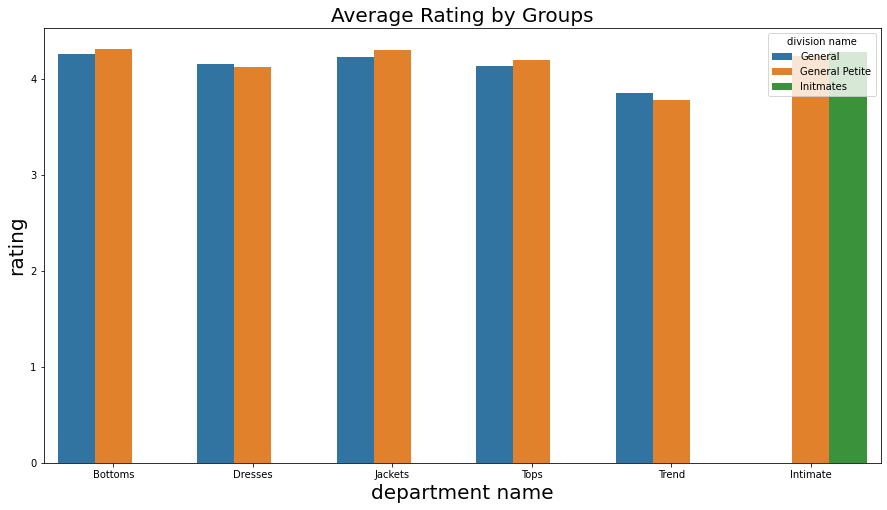

In [16]:
plt.figure(figsize=(15,8))
plt.xlabel("X-Axis", fontsize = 20)
plt.ylabel("Y-Axis", fontsize = 20)
plt.title("Average Rating by Groups", fontsize = 20)
sns.barplot(data=div_dep_group, x='department name', y='rating', hue='division name')

In [28]:
div_dep_group['div dep'] = div_dep_group['department name'] + div_dep_group['division name']

<AxesSubplot:ylabel='div dep'>

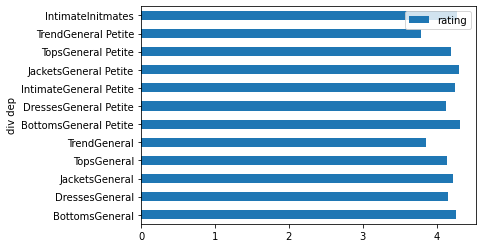

In [31]:
div_dep_group.plot(kind='barh', y='rating', x = 'div dep')


In [ ]:
clothing.iloc[5]['review text']

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [ ]:
TextBlob(clothing.iloc[5]['review text']).sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [ ]:
clothing.iloc[56]['review text']

"I am pregnant and i thought this would be a great sleep bra. it's soft and fits okay, but it has zero support or shape. i would only buy if you are a b cup or smaller and can get away without support. if i would have seen this is the store, i would have passed over it. however, i was too lazy to return so i am wearing it. it's comfortable so that's a redeeming quality. i would not recommend for larger chested ladies, though!"

In [ ]:
TextBlob(clothing.iloc[56]['review text']).sentiment

Sentiment(polarity=0.23833333333333334, subjectivity=0.6399999999999999)

In [ ]:
clothing.iloc[500]['review text']

"I first saw this jacket hanging at the store and it didn't look very cute. i saw it again on sale so i decided to try it on. i'm so glad i did! the inside gray material is so soft. i have broad shoulders and this jacket did not hinder my arms at all. it is very comfortable. i bought the x-small and was very surprised at how roomy it was. the sleeves are a tad bit long but the gray inner lining has an elastic cuff so it can be pushed up. not sure if the xx-small would've been too small or if the"

In [ ]:
TextBlob(clothing.iloc[500]['review text']).sentiment


Sentiment(polarity=0.1625, subjectivity=0.6228535353535354)

In [ ]:
test = TextBlob(clothing.iloc[500]['review text'])
test.sentences

[Sentence("I first saw this jacket hanging at the store and it didn't look very cute."),
 Sentence("i saw it again on sale so i decided to try it on."),
 Sentence("i'm so glad i did!"),
 Sentence("the inside gray material is so soft."),
 Sentence("i have broad shoulders and this jacket did not hinder my arms at all."),
 Sentence("it is very comfortable."),
 Sentence("i bought the x-small and was very surprised at how roomy it was."),
 Sentence("the sleeves are a tad bit long but the gray inner lining has an elastic cuff so it can be pushed up."),
 Sentence("not sure if the xx-small would've been too small or if the")]

In [ ]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            19675 non-null  object 
 1   review text      22641 non-null  object 
 2   rating           22641 non-null  int64  
 3   division name    22628 non-null  object 
 4   department name  22628 non-null  object 
 5   sentiment        22641 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
min_pol_group = clothing.groupby(['division name', 'department name']).sentiment.min().reset_index()

In [ ]:
min_pol_group

,division name,department name,sentiment
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


In [ ]:
min_sorted = min_pol_group.sort_values('sentiment')

<AxesSubplot:title={'center':'Minimum sentiment polarity by groups'}, xlabel='sentiment', ylabel='department name'>

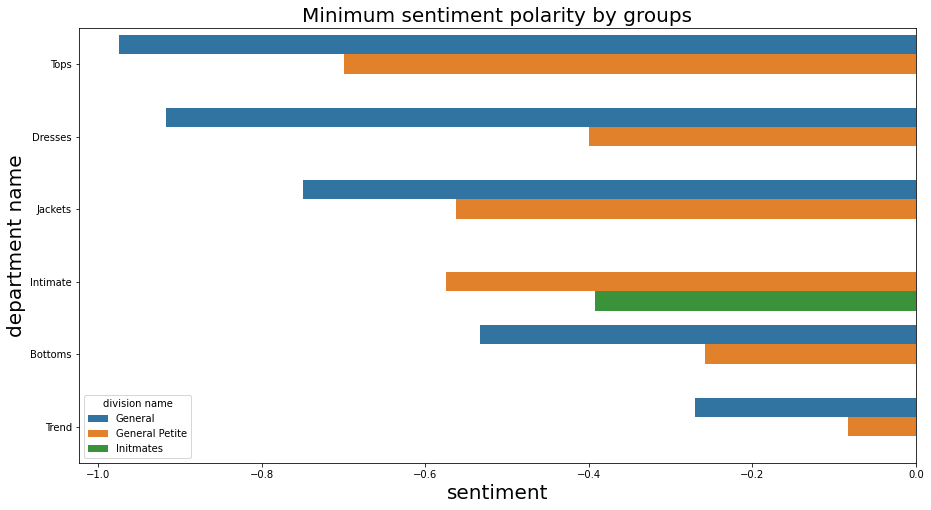

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("X-Axis", fontsize = 20)
plt.ylabel("Y-Axis", fontsize = 20)
plt.title("Minimum sentiment polarity by groups", fontsize = 20)
sns.barplot(data=min_sorted, x='sentiment', y='department name', hue='division name')

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = nlp(clothing.iloc[500]['review text'])

In [ ]:
text

I first saw this jacket hanging at the store and it didn't look very cute. i saw it again on sale so i decided to try it on. i'm so glad i did! the inside gray material is so soft. i have broad shoulders and this jacket did not hinder my arms at all. it is very comfortable. i bought the x-small and was very surprised at how roomy it was. the sleeves are a tad bit long but the gray inner lining has an elastic cuff so it can be pushed up. not sure if the xx-small would've been too small or if the

In [ ]:
token_list = [token for token in text]

In [ ]:
token_list

In [ ]:
filtered_tokens = [token for token in text if not token.is_stop]
filtered_tokens

In [ ]:
lemmas = [f"Token: {token}, lemma: {token.lemma_}"for token in filtered_tokens]
lemmas

['Token: saw, lemma: see',
 'Token: jacket, lemma: jacket',
 'Token: hanging, lemma: hang',
 'Token: store, lemma: store',
 'Token: look, lemma: look',
 'Token: cute, lemma: cute',
 'Token: ., lemma: .',
 'Token: saw, lemma: see',
 'Token: sale, lemma: sale',
 'Token: decided, lemma: decide',
 'Token: try, lemma: try',
 'Token: ., lemma: .',
 'Token: glad, lemma: glad',
 'Token: !, lemma: !',
 'Token: inside, lemma: inside',
 'Token: gray, lemma: gray',
 'Token: material, lemma: material',
 'Token: soft, lemma: soft',
 'Token: ., lemma: .',
 'Token: broad, lemma: broad',
 'Token: shoulders, lemma: shoulder',
 'Token: jacket, lemma: jacket',
 'Token: hinder, lemma: hinder',
 'Token: arms, lemma: arm',
 'Token: ., lemma: .',
 'Token: comfortable, lemma: comfortable',
 'Token: ., lemma: .',
 'Token: bought, lemma: buy',
 'Token: x, lemma: x',
 'Token: -, lemma: -',
 'Token: small, lemma: small',
 'Token: surprised, lemma: surprised',
 'Token: roomy, lemma: roomy',
 'Token: ., lemma: .',
 

In [ ]:
filtered_tokens[1].vector

array([ 1.4100432 ,  0.09970935,  0.18752298,  0.089753  , -0.03268467,
        0.13873303, -0.4914641 , -0.76704973,  0.0444436 , -0.20834044,
        0.44705072, -0.50902116, -0.9749008 , -0.10530329, -0.15871692,
        0.21997876, -0.36017734, -0.13370195, -0.25463116,  0.00787947,
       -0.81796324,  0.43504924, -0.04876742,  0.54148984,  0.5384515 ,
        0.01571006,  0.9891368 , -1.0543777 ,  0.9738122 ,  0.79337513,
        0.22139117,  0.2808391 , -0.14978392, -0.54586345,  0.454021  ,
       -0.17905496,  0.12073028, -0.20695302, -0.2839801 ,  1.7512623 ,
       -0.19091164,  0.46307153, -0.69017226, -0.07516009,  0.48683414,
       -0.72235626,  0.36696047,  1.0041621 ,  0.85305953, -0.65384305,
        0.2879561 , -0.42098454, -0.11579655, -0.54665595,  0.1207172 ,
       -0.38238633,  0.5834906 ,  1.2025454 ,  0.233241  , -0.529279  ,
       -0.7499449 , -0.90283275, -0.01705906, -0.8434975 , -0.519104  ,
        0.4683854 , -0.597574  , -0.55090225, -0.11906032,  0.15

In [ ]:
from spacytextblob.spacytextblob import SpacyTextBlob


In [ ]:
nlp.add_pipe('spacytextblob')

In [ ]:
text._.polarity